<a href="https://colab.research.google.com/github/Emmanuel2000x/Desafio-Data-Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [3]:
#Importacion de libreria para graficas
import matplotlib.pyplot as plt
colores = ['#f4a261', '#6c757d', '#2a9d8f', '#e76f51']
colors_pie = [
    "#1f77b4",  # navy blue
    "#ff7f0e",  # orange
    "#2ca02c",  # forest green
    "#d62728",  # red
    "#9467bd",  # purple
    "#17becf",  # teal
    "#7f7f7f",  # gray
    "#bcbd22"   # goldenrod
]

In [4]:
print(tienda4)

                 Producto   Categoría del Producto     Precio  Costo de envío  \
0            Lavavajillas        Electrodomésticos  1084800.0         56000.0   
1                Cama box                  Muebles   473800.0         25400.0   
2     Balón de baloncesto     Deportes y diversión    23700.0             0.0   
3     Modelado predictivo                   Libros    57700.0          1300.0   
4             Auriculares             Electrónicos   138900.0          5600.0   
...                   ...                      ...        ...             ...   
2353      Mesa de comedor                  Muebles   227700.0         12600.0   
2354     Silla de oficina                  Muebles   342000.0         18600.0   
2355         Vaso térmico     Deportes y diversión    36700.0          2400.0   
2356         Set de ollas  Artículos para el hogar   151800.0          8300.0   
2357   Cuerda para saltar     Deportes y diversión    11200.0          1300.0   

     Fecha de Compra       

#1. Análisis de facturación



In [5]:
ventas1 = tienda1['Precio'].sum()
ventas2 = tienda2['Precio'].sum()
ventas3 = tienda3['Precio'].sum()
ventas4 = tienda4['Precio'].sum()
ingresos_totales = [ventas1, ventas2, ventas3, ventas4]

In [6]:
#Analisis por tiempo
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'],format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'],format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'],format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'],format='%d/%m/%Y')

tienda1 = tienda1.sort_values('Fecha de Compra')
tienda2 = tienda2.sort_values('Fecha de Compra')
tienda3 = tienda3.sort_values('Fecha de Compra')
tienda4 = tienda4.sort_values('Fecha de Compra')

tienda1['Cumulative Sales'] = tienda1['Precio'].cumsum()
tienda2['Cumulative Sales'] = tienda2['Precio'].cumsum()
tienda3['Cumulative Sales'] = tienda3['Precio'].cumsum()
tienda4['Cumulative Sales'] = tienda4['Precio'].cumsum()

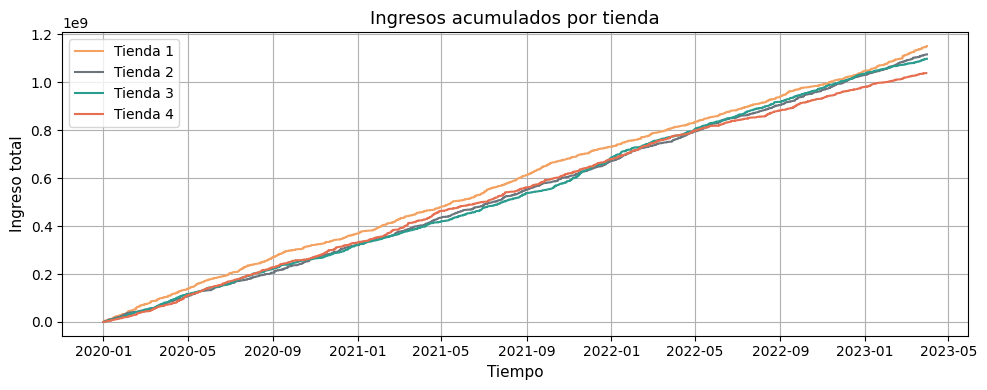

In [7]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))
#Crean barras
ventas_acumuladas1 = ax.plot(tienda1['Fecha de Compra'],tienda1['Cumulative Sales'],color = colores[0],label = tiendas[0])
ventas_acumuladas2 = ax.plot(tienda2['Fecha de Compra'],tienda2['Cumulative Sales'],color = colores[1],label = tiendas[1])
ventas_acumuladas3 = ax.plot(tienda3['Fecha de Compra'],tienda3['Cumulative Sales'],color = colores[2],label = tiendas[2])
ventas_acumuladas4 = ax.plot(tienda4['Fecha de Compra'],tienda4['Cumulative Sales'],color = colores[3],label = tiendas[3])
#Se agregan etiquetas
ax.set_title('Ingresos acumulados por tienda',fontsize=13)
ax.set_xlabel('Tiempo',fontsize=11)
ax.set_ylabel('Ingreso total',fontsize=11)
ax.legend()
plt.grid()
plt.tight_layout()
#Se muestra el grafico
plt.show()

In [8]:
print(ingresos_totales)

[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


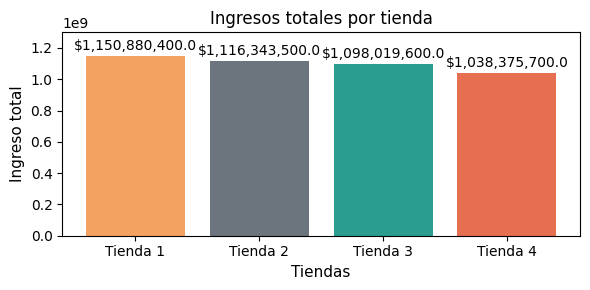

In [9]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
#Crean barras
barras_ingresos = ax.bar(tiendas, ingresos_totales, color = colores)
#Se agregan etiquetas
ax.set_title('Ingresos totales por tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Ingreso total',fontsize=11)
ax.set_ylim(0, 1.3e+9)
plt.tight_layout()
#Se agregan datos en barras
ax.bar_label(barras_ingresos, labels=[f"${ingreso:,}" for ingreso in ingresos_totales], padding=2)
#Se muestra el grafico
plt.show()

# 2. Ventas por categoría

In [10]:
#Cantidad de ingresos de cada categoria
ingresos_por_categoria1 = tienda1.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ingresos_por_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ingresos_por_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ingresos_por_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ingresos_totales_categoria = [ingresos_por_categoria1, ingresos_por_categoria2, ingresos_por_categoria3, ingresos_por_categoria4]
ingresos_por_categoria1

,Precio
Categoría del Producto,
Electrónicos,429493500.0
Electrodomésticos,363685200.0
Muebles,187633700.0
Instrumentos musicales,91299000.0
Deportes y diversión,39290000.0
Juguetes,17995700.0
Artículos para el hogar,12698400.0
Libros,8784900.0


In [11]:
#Cantidad de ventas de cada categoria
ventas_por_categoria1 = tienda1["Categoría del Producto"].value_counts()
ventas_por_categoria2 = tienda2["Categoría del Producto"].value_counts()
ventas_por_categoria3 = tienda3["Categoría del Producto"].value_counts()
ventas_por_categoria4 = tienda4["Categoría del Producto"].value_counts()
ventas_totales_categoria = [ventas_por_categoria1, ventas_por_categoria2, ventas_por_categoria3, ventas_por_categoria4]

In [12]:
print(ventas_totales_categoria)

[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

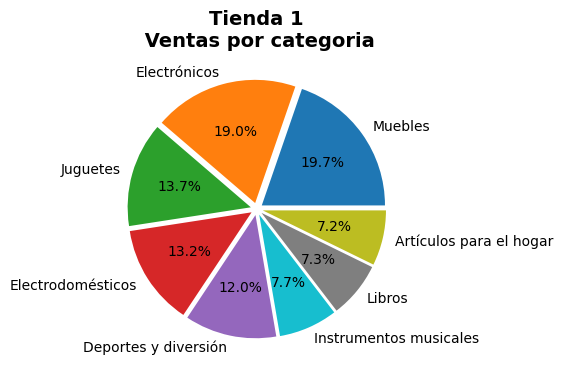

In [13]:
n_tienda = 0
#Create figure and axis
fig, ax = plt.subplots(figsize=(4,4))
#Crean grafico pie
pie_categoria = ax.pie(ventas_totales_categoria[n_tienda].values,
                       labels=ventas_totales_categoria[n_tienda].index,
                       autopct='%.1f%%',
                       colors=colors_pie,
                       explode=[0.05]*len(ventas_totales_categoria[n_tienda].index))
#Se agregan etiquetas
ax.set_title(f'Tienda {n_tienda+1}\n Ventas por categoria',fontsize=14,fontweight='bold')
#Se muestra el grafico
plt.show()

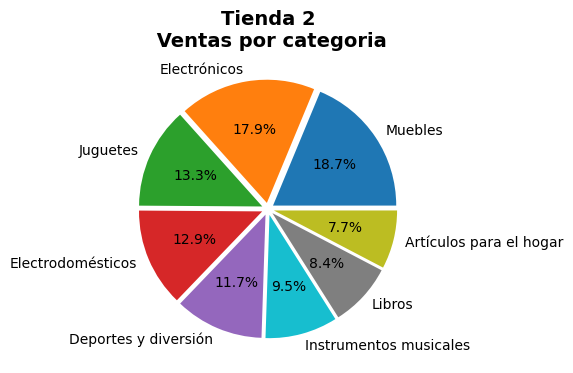

In [14]:
n_tienda = 1
#Create figure and axis
fig, ax = plt.subplots(figsize=(4,4))
#Crean grafico pie
pie_categoria = ax.pie(ventas_totales_categoria[n_tienda].values,
                       labels=ventas_totales_categoria[n_tienda].index,
                       autopct='%.1f%%',
                       colors=colors_pie,
                       explode=[0.05]*len(ventas_totales_categoria[n_tienda].index))
#Se agregan etiquetas
ax.set_title(f'Tienda {n_tienda+1}\n Ventas por categoria',fontsize=14,fontweight='bold')
#Se muestra el grafico
plt.show()

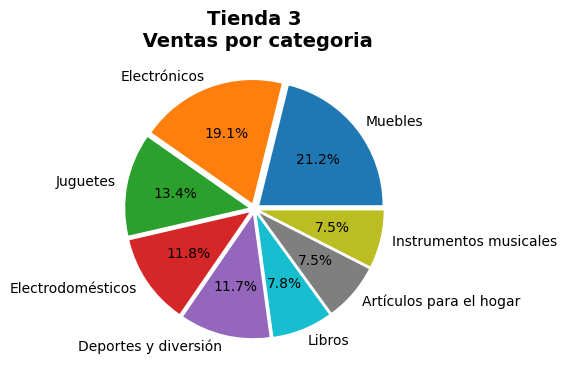

In [15]:
n_tienda = 2
#Create figure and axis
fig, ax = plt.subplots(figsize=(4,4))
#Crean grafico pie
pie_categoria = ax.pie(ventas_totales_categoria[n_tienda].values,
                       labels=ventas_totales_categoria[n_tienda].index,
                       autopct='%.1f%%',
                       colors=colors_pie,
                       explode=[0.05]*len(ventas_totales_categoria[n_tienda].index))
#Se agregan etiquetas
ax.set_title(f'Tienda {n_tienda+1}\n Ventas por categoria',fontsize=14,fontweight='bold')
#Se muestra el grafico
plt.show()

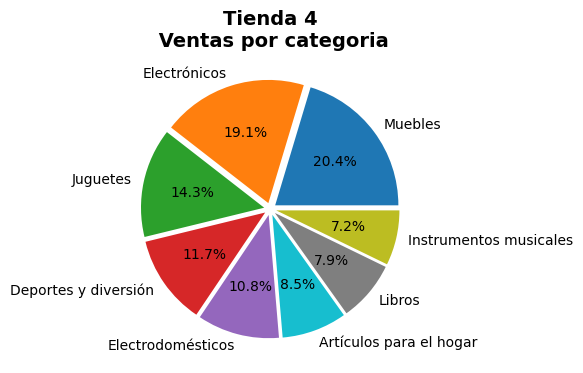

In [16]:
n_tienda = 3
#Create figure and axis
fig, ax = plt.subplots(figsize=(4,4))
#Crean grafico pie
pie_categoria = ax.pie(ventas_totales_categoria[n_tienda].values,
                       labels=ventas_totales_categoria[n_tienda].index,
                       autopct='%.1f%%',
                       colors=colors_pie,
                       explode=[0.05]*len(ventas_totales_categoria[n_tienda].index))
#Se agregan etiquetas
ax.set_title(f'Tienda {n_tienda+1}\n Ventas por categoria',fontsize=14,fontweight='bold')
#Se muestra el grafico
plt.show()

# 3. Calificación promedio de la tienda


In [17]:
satisfaccion1 = tienda1["Calificación"].mean().round(2)
satisfaccion2 = tienda2["Calificación"].mean().round(2)
satisfaccion3 = tienda3["Calificación"].mean().round(2)
satisfaccion4 = tienda4["Calificación"].mean().round(2)
valoracion_por_tienda = [satisfaccion1, satisfaccion2, satisfaccion3, satisfaccion4]

In [73]:
print(valoracion_por_tienda)

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


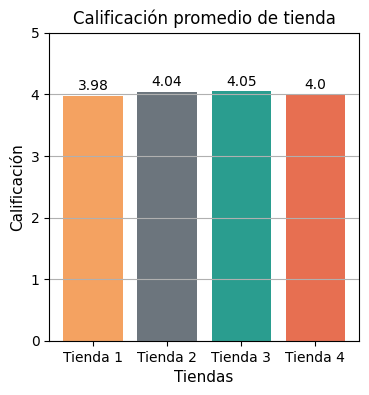

In [74]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(4, 4))
#Crean barras
barras_calificacion = ax.bar(tiendas, valoracion_por_tienda, color = colores)
#Se agregan etiquetas
ax.set_title('Calificación promedio de tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Calificación',fontsize=11)
ax.set_ylim(0, 5)
ax.grid(axis='y')
#Se agregan datos en barras
ax.bar_label(barras_calificacion, labels=[f"{calif:,}" for calif in valoracion_por_tienda], padding=2)
#Se muestra el grafico
plt.show()

# 4. Productos más y menos vendidos

In [20]:
ventas_por_producto1 = tienda1.Producto.value_counts()
ventas_por_producto2 = tienda2.Producto.value_counts()
ventas_por_producto3 = tienda3.Producto.value_counts()
ventas_por_producto4 = tienda4.Producto.value_counts()
ventas_totales_producto = [ventas_por_producto1, ventas_por_producto2, ventas_por_producto3, ventas_por_producto4]

In [21]:
print(ventas_totales_producto)

[Producto
Armario                        60
TV LED UHD 4K                  60
Microondas                     60
Secadora de ropa               58
Bloques de construcción        56
Mesa de noche                  56
Balón de baloncesto            55
Vaso térmico                   54
Bicicleta                      54
Impresora                      54
Refrigerador                   54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Iphone 15                      49
Ajedrez de madera              49
Lavavajillas                   48
Guitarra eléctrica             47
Lavadora de ropa               47
Silla de oficina               46
Sofá reclinable                46
Guitarra acústica              46
Estufa                         45
Mesa de centro                 44
Cama king                      44
Cubo mágico 8x8                44
Cama box                       44
Kit 

In [22]:
reducido_3 = [pd.concat([serie.nlargest(5),serie.nsmallest(5).sort_values(ascending=False)]) for serie in ventas_totales_producto]
print(reducido_3)

[Producto
Armario                      60
TV LED UHD 4K                60
Microondas                   60
Secadora de ropa             58
Bloques de construcción      56
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: count, dtype: int64, Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Auriculares                  37
Sillón                       35
Impresora                    34
Mesa de comedor              34
Juego de mesa                32
Name: count, dtype: int64, Producto
Kit de bancas              57
Cama king                  56
Mesa de comedor            56
Mesa de noche              55
Set de ollas               55
Vaso térmico               38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques 

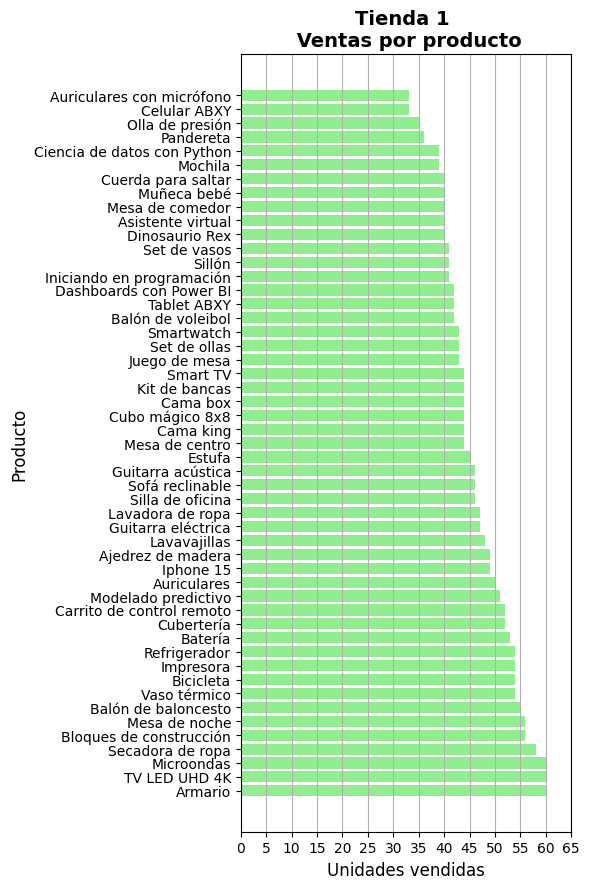

In [23]:
n_tienda = 0
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 9))
plt.barh(ventas_totales_producto[n_tienda].index,
         ventas_totales_producto[n_tienda].values
         ,color='lightgreen')
plt.ylabel('Producto',fontsize=12)
plt.xlabel('Unidades vendidas',fontsize=12)
plt.title(f'Tienda {n_tienda+1} \n Ventas por producto',fontsize=14,fontweight='bold')
# Grid only on x-axis
ax.grid(axis='x')
ax.set_xticks(list(range(0, 70, 5)))
plt.tight_layout()
#Se muestra el grafico
plt.show()

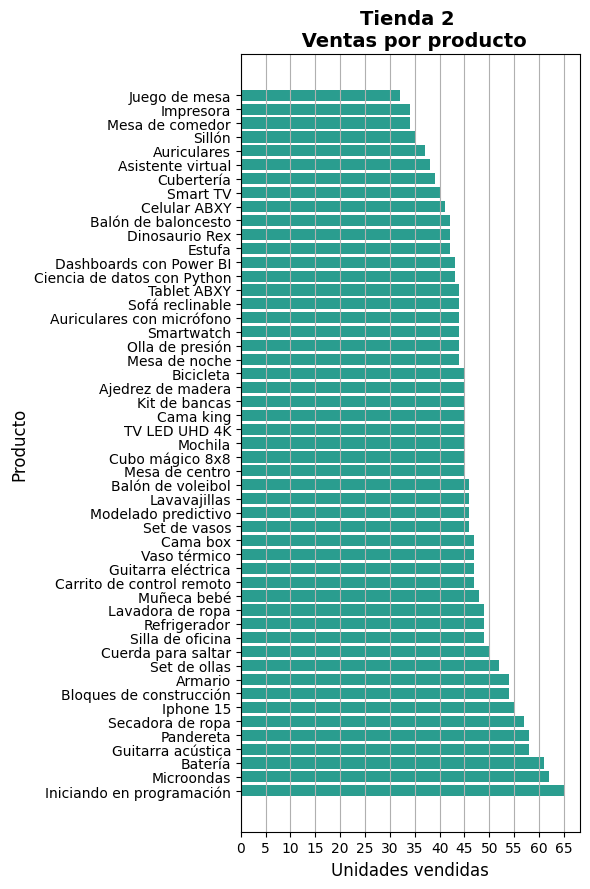

In [24]:
n_tienda = 1
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 9))
plt.barh(ventas_totales_producto[n_tienda].index,
         ventas_totales_producto[n_tienda].values
         ,color='#2a9d8f')
plt.ylabel('Producto',fontsize=12)
plt.xlabel('Unidades vendidas',fontsize=12)
plt.title(f'Tienda {n_tienda+1} \n Ventas por producto',fontsize=14,fontweight='bold')
# Grid only on x-axis
ax.grid(axis='x')
ax.set_xticks(list(range(0, 70, 5)))
plt.tight_layout()
#Se muestra el grafico
plt.show()



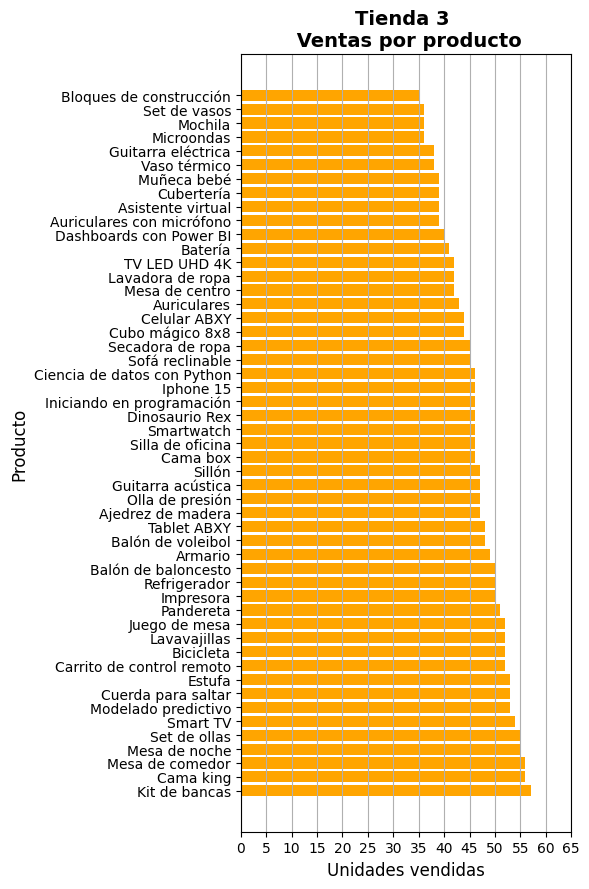

In [25]:
n_tienda = 2
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 9))
plt.barh(ventas_totales_producto[n_tienda].index,
         ventas_totales_producto[n_tienda].values
         ,color='orange')
plt.ylabel('Producto',fontsize=12)
plt.xlabel('Unidades vendidas',fontsize=12)
plt.title(f'Tienda {n_tienda+1} \n Ventas por producto',fontsize=14,fontweight='bold')
# Grid only on x-axis
ax.grid(axis='x')
ax.set_xticks(list(range(0, 70, 5)))
plt.tight_layout()
#Se muestra el grafico
plt.show()

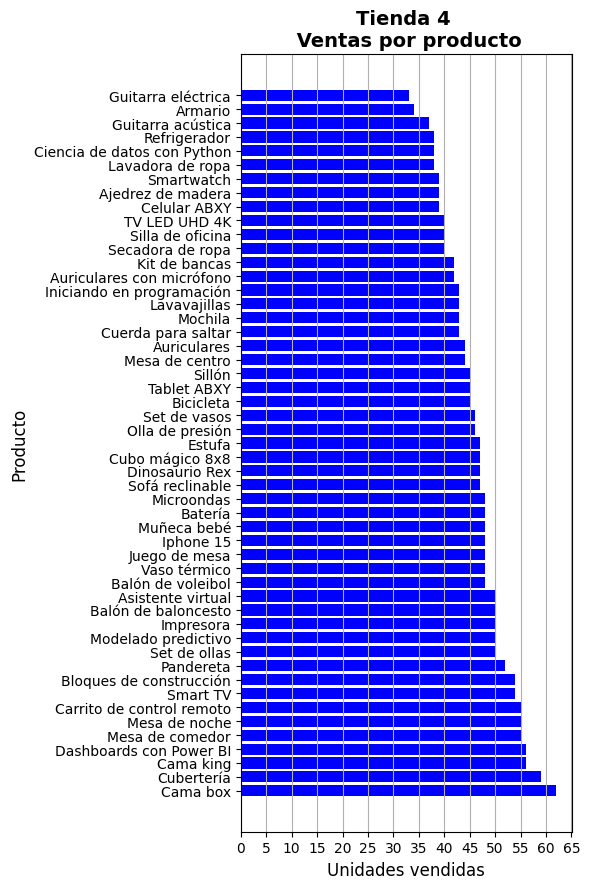

In [26]:
n_tienda = 3
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 9))
plt.barh(ventas_totales_producto[n_tienda].index,
         ventas_totales_producto[n_tienda].values
         ,color='blue')
plt.ylabel('Producto',fontsize=12)
plt.xlabel('Unidades vendidas',fontsize=12)
plt.title(f'Tienda {n_tienda+1} \n Ventas por producto',fontsize=14,fontweight='bold')
# Grid only on x-axis
ax.grid(axis='x')
ax.set_xticks(list(range(0, 70, 5)))
plt.tight_layout()
#Se muestra el grafico
plt.show()

# 5. Envío promedio por tienda

Se calcula el promedio de gasto en envío de cada tienda

In [32]:
costo_promedio_envio1 = tienda1['Costo de envío'].mean().round(2)
costo_promedio_envio2 = tienda2['Costo de envío'].mean().round(2)
costo_promedio_envio3 = tienda3['Costo de envío'].mean().round(2)
costo_promedio_envio4 = tienda4['Costo de envío'].mean().round(2)
tienda_promedio_envio = [costo_promedio_envio1, costo_promedio_envio2, costo_promedio_envio3, costo_promedio_envio4]

costo_total_envio1 = tienda1['Costo de envío'].sum()
costo_total_envio2 = tienda2['Costo de envío'].sum()
costo_total_envio3 = tienda3['Costo de envío'].sum()
costo_total_envio4 = tienda4['Costo de envío'].sum()
costo_total_envio = [costo_total_envio1, costo_total_envio2, costo_total_envio3, costo_total_envio4]

balance = []

for i in range(len(costo_total_envio)):
    balance.append(ingresos_totales[i] - costo_total_envio[i])

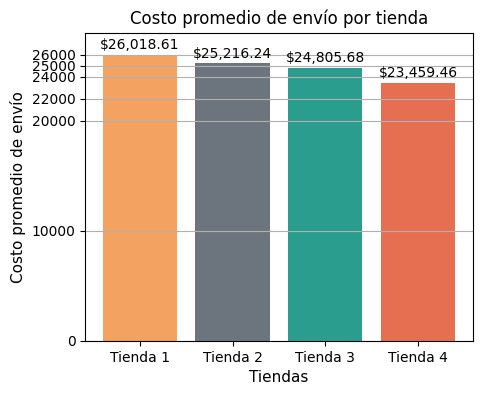

In [29]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
#Crean barras
barras_envios = ax.bar(tiendas, tienda_promedio_envio, color = colores)
#Se agregan etiquetas
ax.set_title('Costo promedio de envío por tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Costo promedio de envío',fontsize=11)
ax.set_ylim(0, 28000)
ax.grid(axis='y')  # Grid only on y-axis
# Add mayot tick y
ax.set_yticks([0, 10000, 20000, 22000,24000,25000,26000])
#Se agregan datos en barras
ax.bar_label(barras_envios, labels=[f"${costo:,}" for costo in tienda_promedio_envio], padding=2)
#Se muestra el grafico
plt.show()

# Informe final


En este informe se desgloza el desempeño de 4 sucursales de Alura Store para realizar una comparativa entre ellas con el fin de vender una de estas. Para esto se compararan sus ingresos, gastos de envio, ventas por categoria y producto asi como la calificacion promedio del cliente.

##Ingresos

Para este apartado se sumaron todas las ventas de cada tienda ademas de agregar un gráfico de las ventas acumuladas a lo largo del tiempo con el fin de comparar el desempeño.

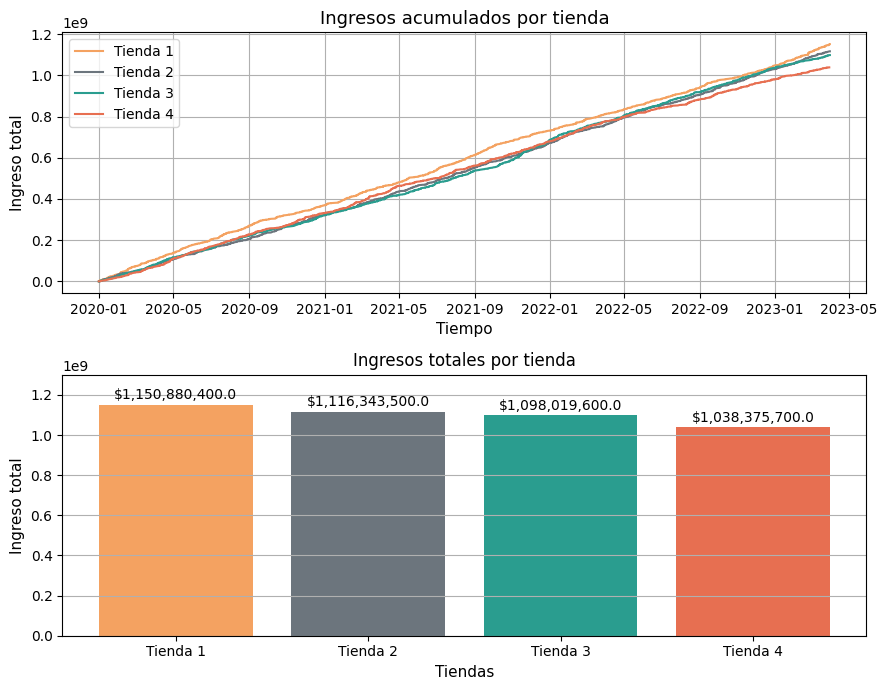

In [30]:
#Create figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))
barras_ingresos = ax2.bar(tiendas, ingresos_totales, color = colores)
#Se agregan etiquetas
ax2.set_title('Ingresos totales por tienda',fontsize=12)
ax2.set_xlabel('Tiendas',fontsize=11)
ax2.set_ylabel('Ingreso total',fontsize=11)
ax2.set_ylim(0, 1.3e+9)
#Se agregan datos en barras
ax2.bar_label(barras_ingresos, labels=[f"${ingreso:,}" for ingreso in ingresos_totales], padding=2)
#Crean lineas
ventas_acumuladas1 = ax1.plot(tienda1['Fecha de Compra'],tienda1['Cumulative Sales'],color = colores[0],label = tiendas[0])
ventas_acumuladas2 = ax1.plot(tienda2['Fecha de Compra'],tienda2['Cumulative Sales'],color = colores[1],label = tiendas[1])
ventas_acumuladas3 = ax1.plot(tienda3['Fecha de Compra'],tienda3['Cumulative Sales'],color = colores[2],label = tiendas[2])
ventas_acumuladas4 = ax1.plot(tienda4['Fecha de Compra'],tienda4['Cumulative Sales'],color = colores[3],label = tiendas[3])
#Se agregan etiquetas
ax1.set_title('Ingresos acumulados por tienda',fontsize=13)
ax1.set_xlabel('Tiempo',fontsize=11)
ax1.set_ylabel('Ingreso total',fontsize=11)
ax1.legend()
#Se agrega malla
ax1.grid()
ax2.grid(axis='y')
plt.tight_layout()
#Se muestra el grafico
plt.show()

Vemos que la ***tienda 1*** es la que mas vende tendencia que mantiene a lo largo del tiempo, mientras que la ***tienda 4*** termina siendo la que menos vendio casi un 10% menos que la ***tienda 1*** sin embargo esto no se mantiene en todo el tiempo como se observa en la grafica de ingresos acumuladossiendo la tienda 4 la segunda tienda con mas ventas o manteniendose cerca de las otras.

##Categorias de productos

Para el analisis de ventas por categoria se puede realizar desde la cantidad de ventas por categoria o por la cantidad de ingresos generados por categoria para el primer caso vemos lo siguiente:

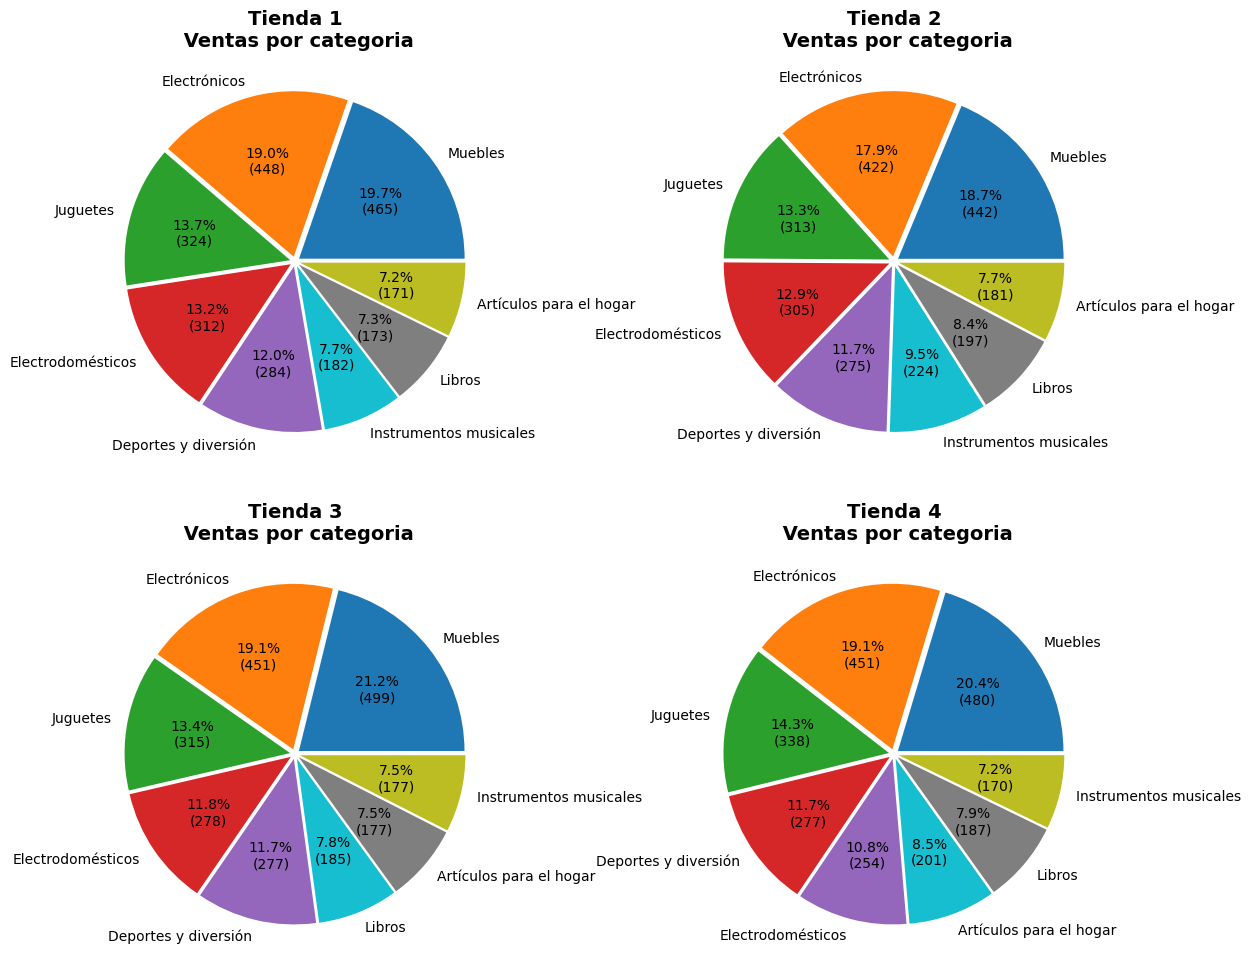

In [69]:
import numpy as np
# Creamos la figura
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Flatten axes array for easy iteration
axes = axes.flatten()
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

for tienda in range(len(tiendas)):
  #Crean grafico pie
  axes[tienda].pie(ventas_totales_categoria[tienda].values,
                       labels=ventas_totales_categoria[tienda].index,
                       autopct=lambda pct: func(pct, ventas_totales_categoria[tienda].values),
                       colors=colors_pie,
                       explode=[0.03]*len(ventas_totales_categoria[tienda].index))
  #Se agregan etiquetas
  axes[tienda].set_title(f'Tienda {tienda+1}\n Ventas por categoria',fontsize=14,fontweight='bold')

plt.tight_layout()
plt.show()


Podemos observar que las ventas principales de todas las tiendas se concentran en 3 categorias Juguetes, Electronicos y Muebles por lo que podemos enfocarnos en conservar las tiendas que mejores ventas tengan en esas categorias

##Calificaciones promedio

En este apartado como podemos ver en el grafico las calificaciones promedio de cada tienda son muy similares por lo que no lo consideraria un factor principal para la toma de decision.

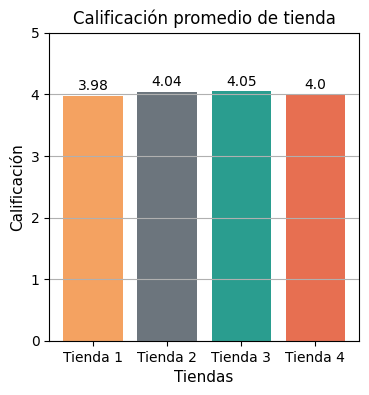

In [17]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(4, 4))
#Crean barras
barras_calificacion = ax.bar(tiendas, valoracion_por_tienda, color = colores)
#Se agregan etiquetas
ax.set_title('Calificación promedio de tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Calificación',fontsize=11)
ax.set_ylim(0, 5)
ax.grid(axis='y')
#Se agregan datos en barras
ax.bar_label(barras_calificacion, labels=[f"{calif:,}" for calif in valoracion_por_tienda], padding=2)
#Se muestra el grafico
plt.show()

##Productos mas y menos vendidos

Ahora segimos analizando los productos mas y menos vendidos para esto solo mostraremos los 5 productos mas vendidos asi como los 5 menos vendidos de todas las tiendas.

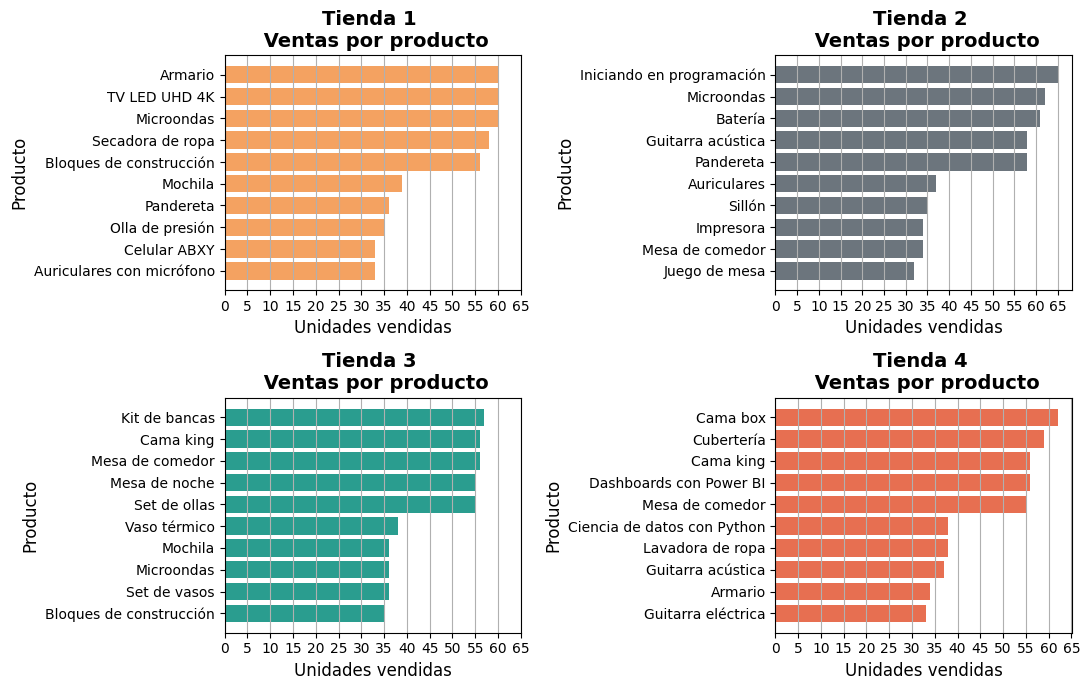

In [72]:
# Creamos la figura
fig, axes = plt.subplots(2, 2, figsize=(11, 7))
# Flatten axes array for easy iteration
axes = axes.flatten()
for tienda in range(len(tiendas)):
  axes[tienda].barh(reducido_3[tienda].index,
          reducido_3[tienda].values
          ,color=colores[tienda])
  axes[tienda].set_ylabel('Producto',fontsize=12)
  axes[tienda].set_xlabel('Unidades vendidas',fontsize=12)
  axes[tienda].set_title(f'Tienda {tienda+1} \n Ventas por producto',fontsize=14,fontweight='bold')
  # Grid only on x-axis
  axes[tienda].grid(axis='x')
  axes[tienda].set_xticks(list(range(0, 70, 5)))
  axes[tienda].invert_yaxis()
#Se muestra el grafico
plt.tight_layout()
plt.show()

Como se ve realmente no existe un producto en especifico que tenga un gran numero de ventas en todas las tiendas por lo que resulta mejor mantener el enfoque de las ventas sobre las categorias.


##Coste de envio promedio

En este apartado se desconoce si el costo de envio corre por parte de la tienda es decir que se le resta a los ingresos o si este es cubierto por el cliente por lo que seria parte del costo de la compra.

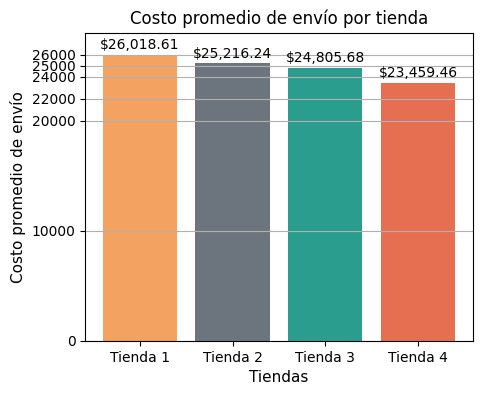

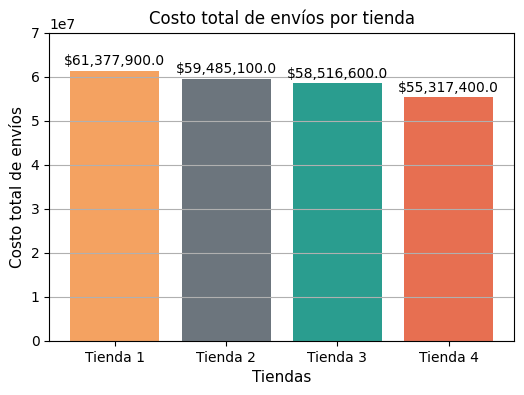

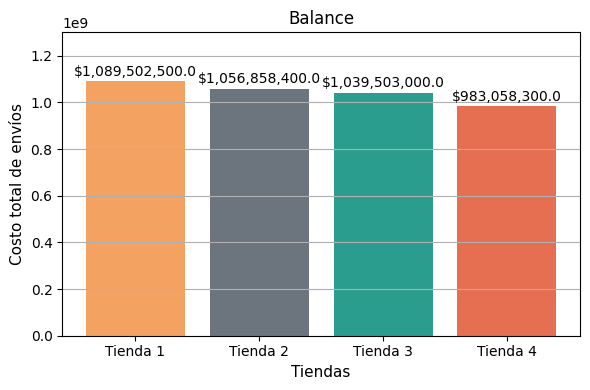

In [70]:
#Create figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
#Crean barras
barras_envios = ax.bar(tiendas, tienda_promedio_envio, color = colores)
#Se agregan etiquetas
ax.set_title('Costo promedio de envío por tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Costo promedio de envío',fontsize=11)
ax.set_ylim(0, 28000)
ax.grid(axis='y')  # Grid only on y-axis
# Add mayot tick y
ax.set_yticks([0, 10000, 20000, 22000,24000,25000,26000])
#Se agregan datos en barras
ax.bar_label(barras_envios, labels=[f"${costo:,}" for costo in tienda_promedio_envio], padding=2)
#Se muestra el grafico
plt.show()
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
#Crean barras
barras_envios = ax.bar(tiendas, costo_total_envio, color = colores)
#Se agregan etiquetas
ax.set_title('Costo total de envíos por tienda',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Costo total de envíos',fontsize=11)
ax.set_ylim(0, 7e+7)
ax.grid(axis='y')  # Grid only on y-axis
# Add mayot tick y
#Se agregan datos en barras
ax.bar_label(barras_envios, labels=[f"${costo:,}" for costo in costo_total_envio], padding=2)
#Se muestra el grafico
plt.show()
#Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
#Crean barras
barras_envios = ax.bar(tiendas, balance, color = colores)
#Se agregan etiquetas
ax.set_title('Balance',fontsize=12)
ax.set_xlabel('Tiendas',fontsize=11)
ax.set_ylabel('Costo total de envíos',fontsize=11)
ax.set_ylim(0, 13e+8)
ax.grid(axis='y')  # Grid only on y-axis
# Add mayot tick y
#Se agregan datos en barras
ax.bar_label(barras_envios, labels=[f"${costo:,}" for costo in balance], padding=2)
#Se muestra el grafico
plt.tight_layout()
plt.show()

De cualquier forma podemos considerar el costo pormedio del envio por tienda como parte de la experiencia de compra del cliente a menor costo de envio el producto es mas barato para el cliente o bien la ganancia es mayor para la tienda. Como se observa en las graficas anteriores la ***tienda 1*** tiene el costo de envio promedio mas caro de todas mientras que el de la ***tienda 4*** es un 10% menor esta diferencia se mantiene aun si el costo del envio corriera por parte de las tiendas.

##Conclusion

Con los datos obtenidos porpongo eliminar la tienda numero 4 dado que el ultimo año la tienda no a mantenido el mismo desempeño de ventas que las otras como se ve en los ingresos acumulados a lo largo del tiempo. Sin embargo y apesar de que el costo de envio de dicha tienda es el menor de todos su balance sigue siendo el menor de todos.

No podemos concluir nada apartir de la calificacion de cada tienda al ser tan similares ademas que para realizar un analisis de que tienda conviene vender apartir de los productos que vende cada tienda requeriria saber el enfoque que le quisiera dar a la franquisia.